#TAG SMART EMAIL  

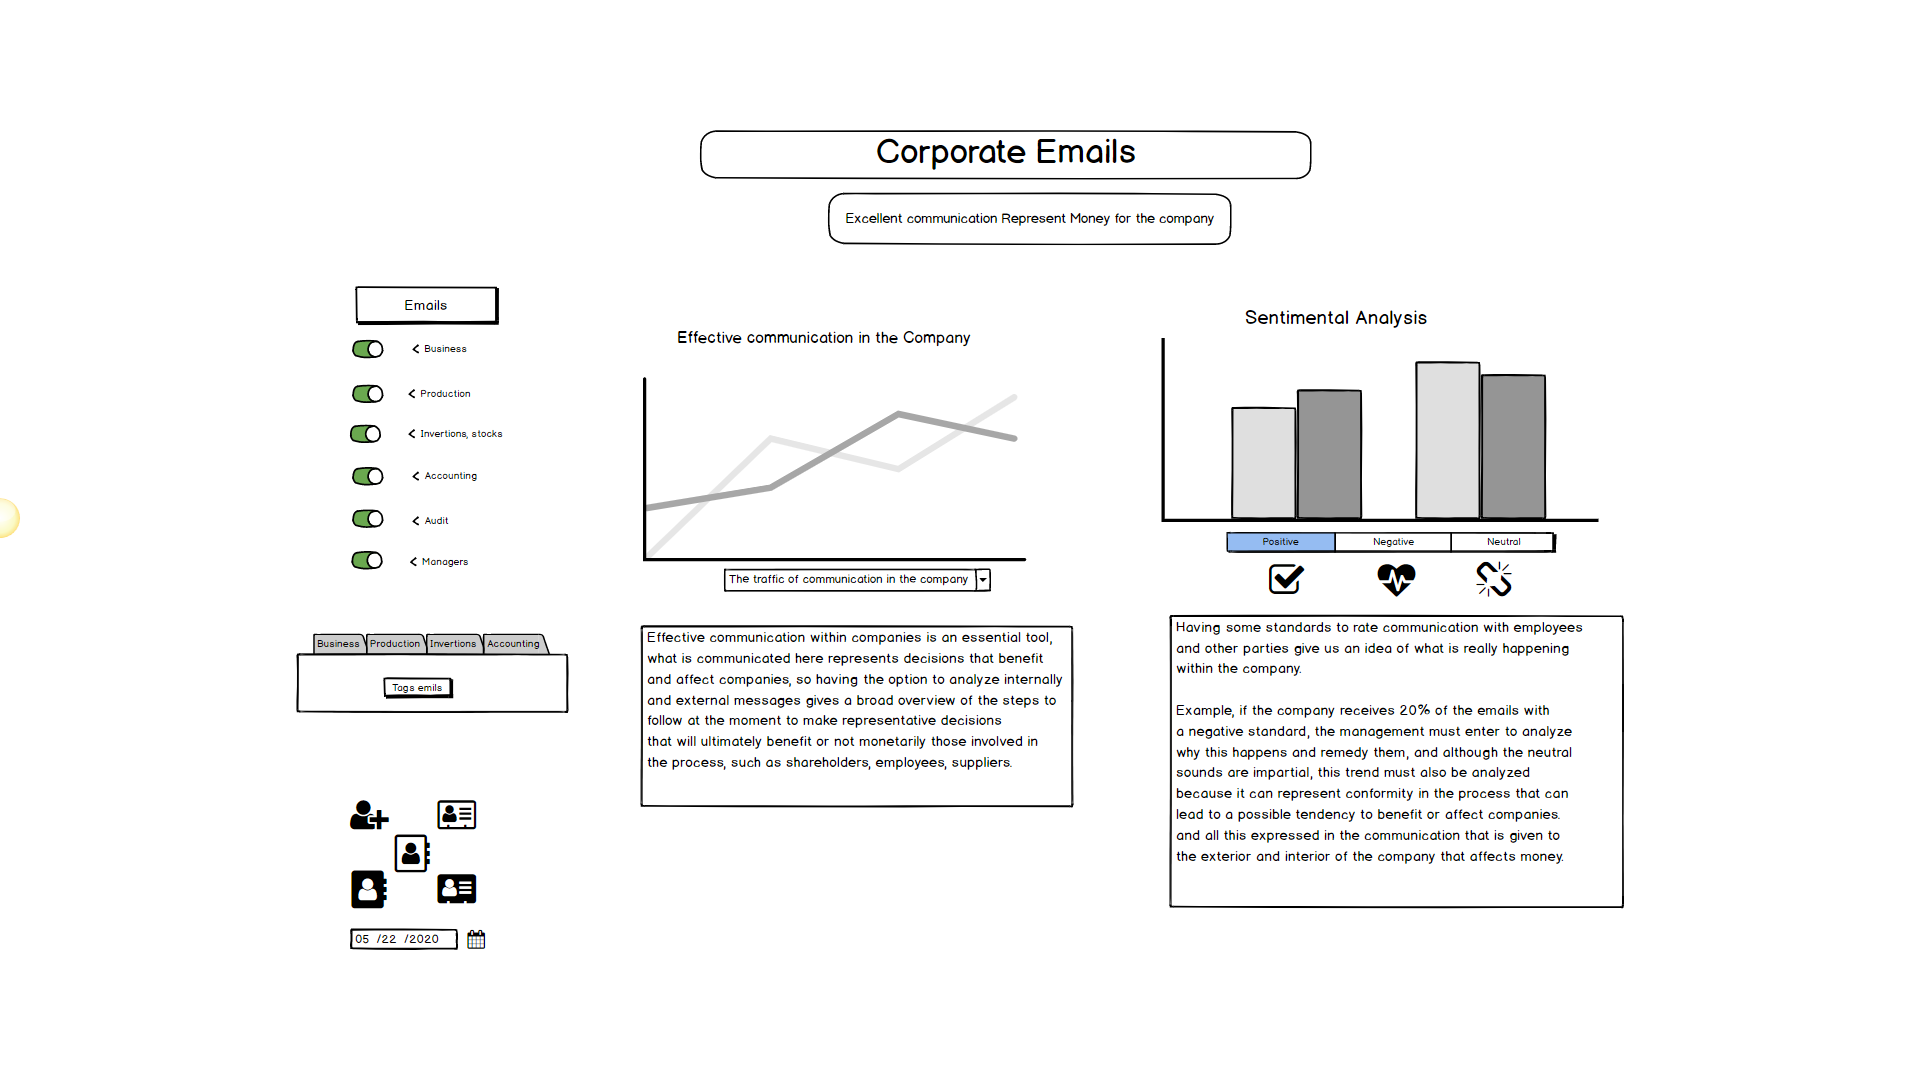

In [0]:
from PIL import Image
# load the image
schema = Image.open('scheme.png')
schema

In [0]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
#import Library
import pandas as pd
import string
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2CBCCKBZJNKYW7S4NK64D6TM'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [0]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [0]:
 df.index

RangeIndex(start=0, stop=10000, step=1)

In [0]:
[s.strip() for s in df['message'][100].splitlines()]

['Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>',
 'Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: cooper.richey@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Cooper Richey',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 "I tried the new address but I don't have access.  also, what do I need to",
 'enter under domain?']

In [0]:
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [0]:
#CLEAN DATASET
import re
import html
def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['rating'] = df['message'].apply(cleanup_html)

In [0]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['rating'] = df['message'].apply(cleanemail)
df["rating"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Jeff,  Jacques Craig will draw up a release.  What is the status on the quote from Wade?  Phillip                                                                                                                                                                                                                                                                                 

In [0]:
df.sort_values(by='rating', ascending=False).head(5)

,file,message,rating
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."


In [0]:
from bs4 import BeautifulSoup

#clean DF
def clean_description(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['rating'] = df['rating'].apply(clean_description)
df['words_length']  = df['rating'].str.len()

In [0]:
#CLEAN DATA

#Str the data
df['rating'] = df['rating'].astype(str)

#remove whitespace
df['rating'] = df['rating'].str.strip().str.lower()

#Start with date
df['rating'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['rating'] = df['rating'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [0]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

#Stopwords:
stop = stopwords.words('english')
df['rating'] = df['rating'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

attach plea find natur ga market analysi today thank bob mckinney nat gasdoc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [0]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [0]:
#creared columns score with numbers
df['Scores'] = df['rating'].apply(vaderizeSentiment)

In [0]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [0]:
for text in df.sort_values(by='neutral', ascending=False)['rating'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n")

------ Topic ------
forecast
------ Topic ------
xorigin arnoldj xfilenam jarnold nonprivilegedpst today intercontinentalexchang launch financ swap settl ur power natur ga indic two new product ng fin sw swap fp ice fin swappeak fp ice list henri hub natu ral ga cinergi pjmwest power plea includ new rket portfolio
------ Topic ------
workstat upgrad secur enhanc standard effort schedul small updat perform login larger updat perform conveni messag box present end upgrad process provid import inform larger updat question issu updat et user call et solut center contact resolut center desktop architectur tent schedul updat houston floor begin noon ecn except thursday octob ecn except monday octob ecn wednesday octob ecn except friday octob ecn monday octob ecn except ga control wednesday octob ecn monday novemb includ trade floor wednesday novemb
------ Topic ------
follow report wait approv day plea review owner henri h quigley report name quigley day mgr queue
------ Topic ------
xbcc xf

In [0]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['rating'].apply(lambda x: score(x, Model))

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_pred']).iloc[:5]

In [0]:
df

,file,message,rating,words_length,Scores,negative,neutral,positive,compound,final_pred
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,forecast,22,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,travel busi meet take fun trip especi prepar p...,783,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.000,0.855,0.145,0.8979,5
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test success way go,30,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.000,0.448,0.552,0.5719,4
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randi send schedul salari level everyon schedu...,183,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,let shoot tuesday,33,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",0.545,0.455,0.000,-0.3400,2


In [0]:
df['final_pred'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_pred, dtype: float64

In [0]:
df = df.drop('words_length', axis=1)

##Graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


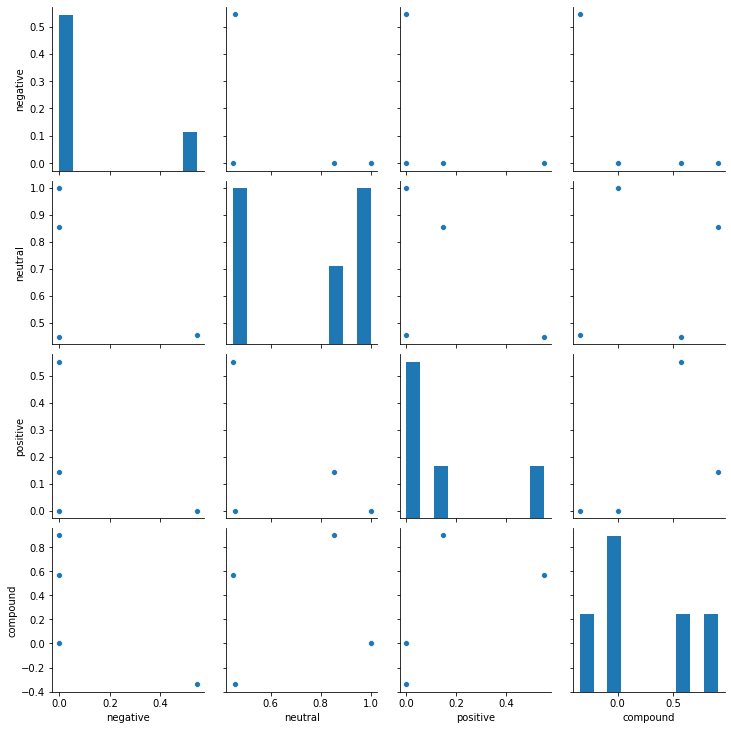

In [0]:
import seaborn as sns
sns.pairplot(df[['negative', 'neutral', 'positive', 'compound']]);

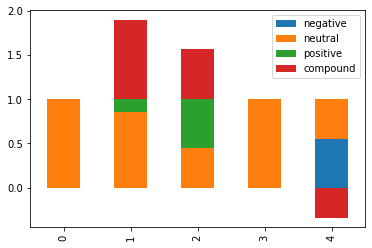

In [0]:
df.plot.bar(stacked=True);

In [0]:
import plotly.express as px

fig = px.histogram(df, x='final_pred', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

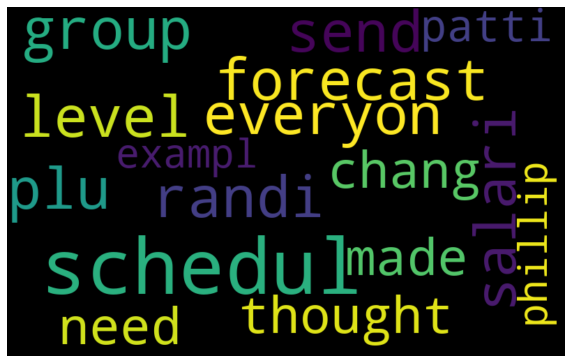

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['rating'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

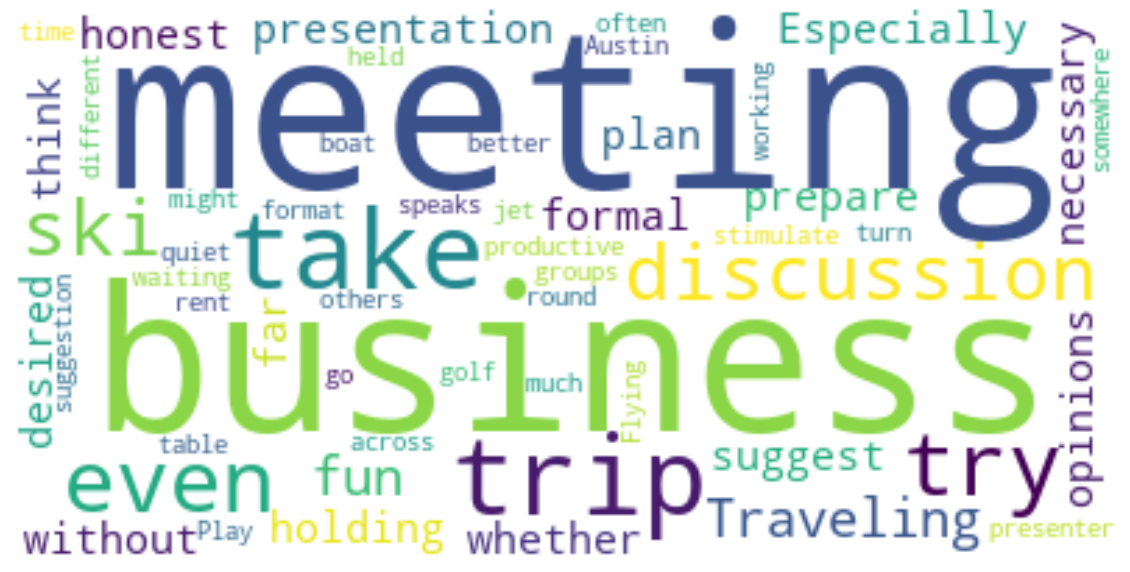

In [0]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()